In [ ]:
#note here i h ave used average sentiment for each day news 
# incase thre are more than one nws per day i have to take the average 
# and check it s corrolertin with date of the stock pricee
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
sns.set(style="whitegrid")
%matplotlib inline
sys.path.append(os.path.abspath(".."))

# Import the correct functions

from src.data_loader import load_news_data, load_stock_files, load_stock_data
from src.strategy_utils import merge_sentiment_all_stocks
from src.visualizer import plot_sentiment_vs_returns 
from src.data_loader import load_filtered_news
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [52]:
# i will just directly use filted news already
tickers = ["AAPL", "AMZN", "TSLA", "MSFT", "GOOG", "META", "NVDA"]
news_df = load_filtered_news(tickers, folder="../Data/filtered/")


In [53]:
#load stock price data
stock_data = load_stock_files("../Data/yfinance_data/")  # returns dict of DataFrames


In [54]:
#printing sample sentimnet file
print(news_df[news_df["stock"] == "AAPL"].tail())



     Unnamed: 0                                           headline  \
436        7585  UBS Maintains Buy on Apple, Lowers Price Targe...   
437        7586                  123 Biggest Movers From Yesterday   
438        7587  Crude Awakening: Energy Sector Takes A 20% Spi...   
439        7588     Investor Movement Index Summary: February 2020   
440        7589      101 Stocks Moving In Monday's Mid-Day Session   

                                                   url      publisher  \
436  https://www.benzinga.com/news/20/03/15514989/u...     Vick Meyer   
437  https://www.benzinga.com/news/20/03/15514298/1...     Lisa Levin   
438  https://www.benzinga.com/news/earnings/20/03/1...     JJ Kinahan   
439  https://www.benzinga.com/news/earnings/20/03/1...  TD Ameritrade   
440  https://www.benzinga.com/news/20/03/15508983/1...     Lisa Levin   

           date stock ticker  polarity  
436  2020-03-10  AAPL   AAPL  0.000000  
437  2020-03-10  AAPL   AAPL  0.000000  
438  2020-03-09  

In [55]:
print(news_df[news_df["stock"] == "GOOG"].head())

      Unnamed: 0                                           headline  \
2606      568379  Facebook, Snap Analyst Projects Q2 Revenue Ups...   
2607      568380  How Cannabis Company Cannaphyll Is Marketing O...   
2608      568381  Twitter, Square Will Mark Juneteenth As Holida...   
2609      568382             Price Over Earnings Overview: Alphabet   
2610      568383  Google Maps To Offer Relevant Local COVID-19 I...   

                                                    url          publisher  \
2606  https://www.benzinga.com/analyst-ratings/analy...   Shanthi Rexaline   
2607  https://www.benzinga.com/markets/cannabis/20/0...        Jaycee Tenn   
2608  https://www.benzinga.com/news/20/06/16218441/t...  Shivdeep Dhaliwal   
2609  https://www.benzinga.com/intraday-update/20/06...  Benzinga Insights   
2610  https://www.benzinga.com/news/20/06/16208274/g...  Shivdeep Dhaliwal   

            date stock ticker  polarity  
2606  2020-06-10  GOOG   GOOG  0.033333  
2607  2020-06-10  GO

In [56]:
merged_data = merge_sentiment_all_stocks(news_df, stock_data)
# loop for all 
for ticker, df in merged_data.items():
    print(f"{ticker} → {df[['Close', 'avg_sentiment']].dropna().shape[0]} matched rows with sentiment")

AAPL → 61 matched rows with sentiment
MSFT → 12 matched rows with sentiment
GOOG → 352 matched rows with sentiment
NVDA → 1125 matched rows with sentiment
TSLA → 230 matched rows with sentiment
AMZN → 28 matched rows with sentiment
META → 74 matched rows with sentiment


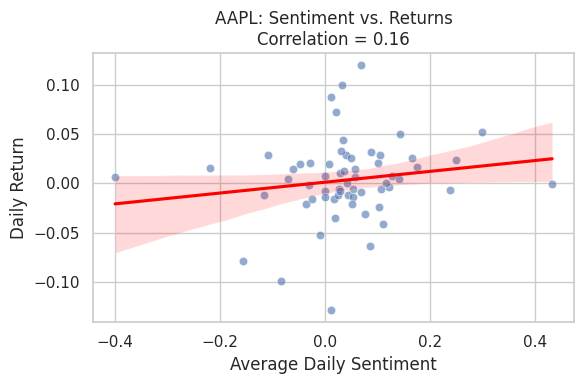

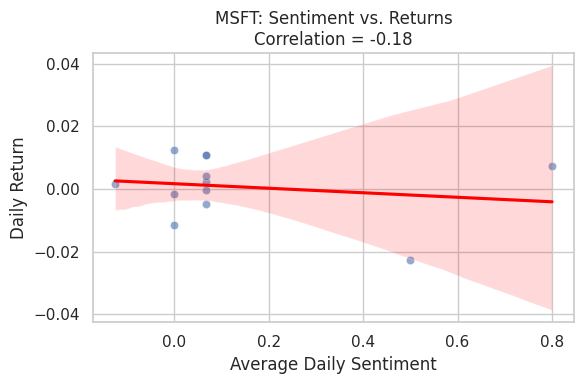

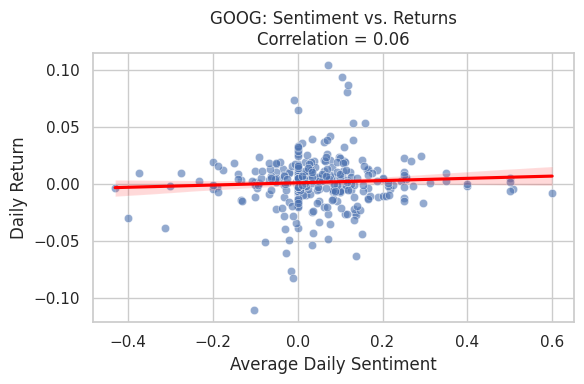

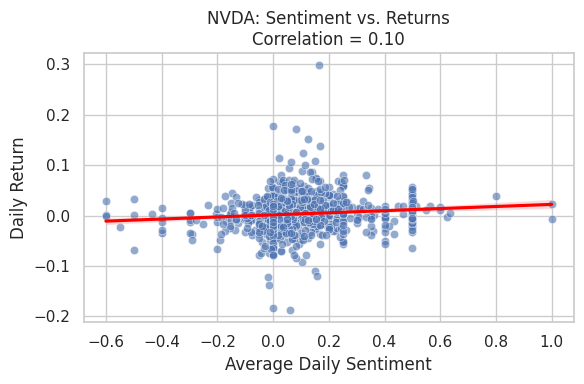

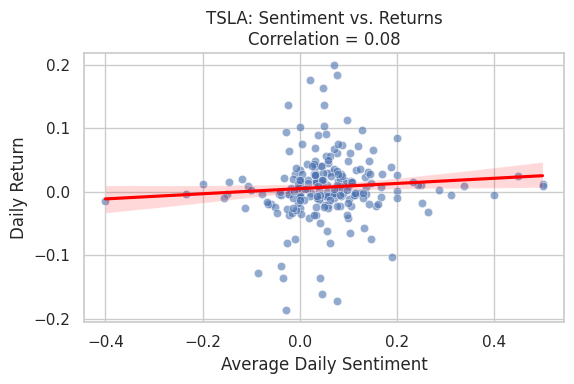

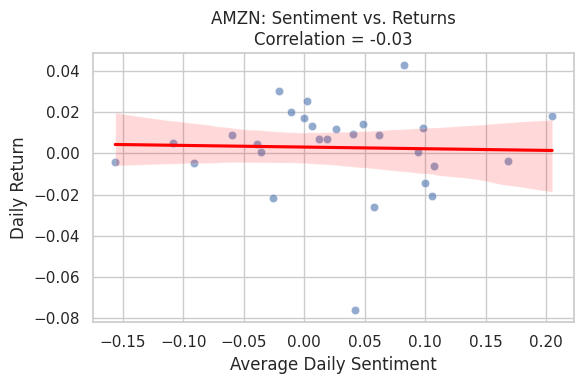

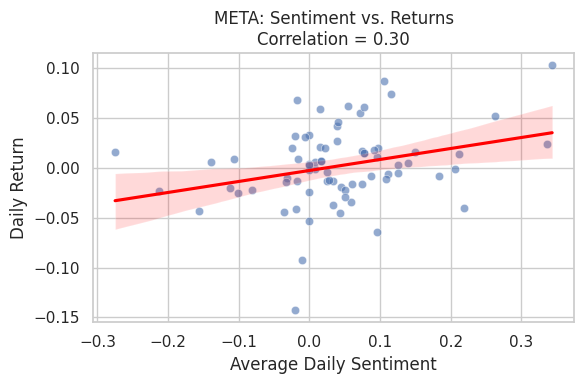

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_results = {}

for ticker, df in merged_data.items():
    if "avg_sentiment" not in df.columns or df["avg_sentiment"].isna().all():
        print(f" Skipping {ticker}: no sentiment data.")
        continue

    df["returns"] = df["Close"].pct_change()
    df = df.dropna(subset=["avg_sentiment", "returns"])

    # Compute Pearson correlation
    correlation = df["avg_sentiment"].corr(df["returns"])
    correlation_results[ticker] = correlation

    # Scatter plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x="avg_sentiment", y="returns", data=df, alpha=0.6)
    sns.regplot(x="avg_sentiment", y="returns", data=df, scatter=False, color="red")
    plt.title(f"{ticker}: Sentiment vs. Returns\nCorrelation = {correlation:.2f}")
    plt.xlabel("Average Daily Sentiment")
    plt.ylabel("Daily Return")
    plt.tight_layout()
    plt.show()


 AAPL:
   Total rows: 10998
   Missing avg_sentiment: 10937
   Missing returns: 1
   Rows available for correlation: 61


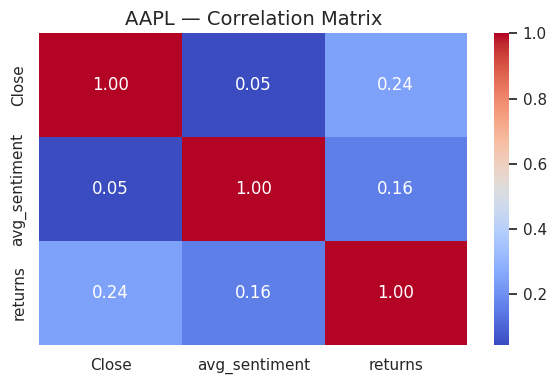

 MSFT:
   Total rows: 9672
   Missing avg_sentiment: 9660
   Missing returns: 1
   Rows available for correlation: 12


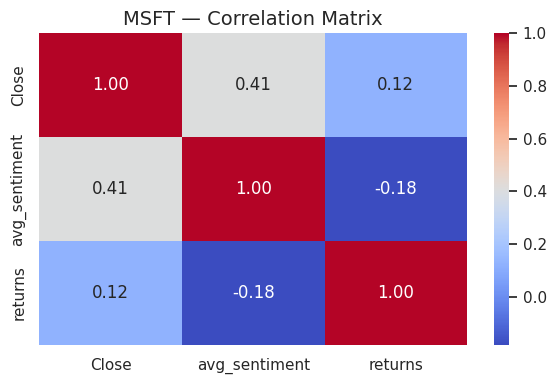

 GOOG:
   Total rows: 5020
   Missing avg_sentiment: 4668
   Missing returns: 1
   Rows available for correlation: 352


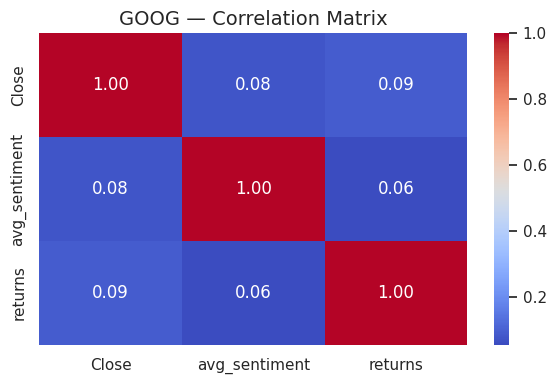

 NVDA:
   Total rows: 6421
   Missing avg_sentiment: 5296
   Missing returns: 1
   Rows available for correlation: 1125


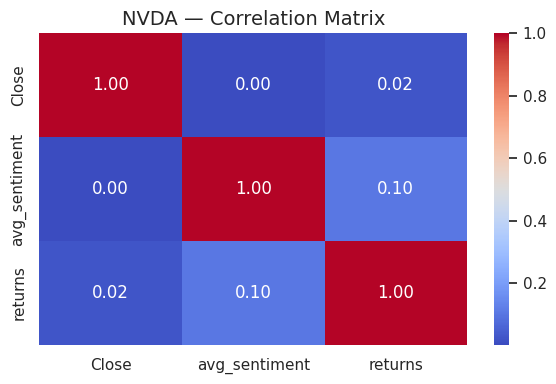

 TSLA:
   Total rows: 3545
   Missing avg_sentiment: 3315
   Missing returns: 1
   Rows available for correlation: 230


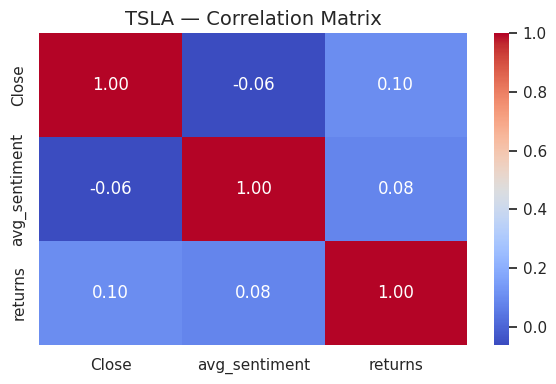

 AMZN:
   Total rows: 6846
   Missing avg_sentiment: 6818
   Missing returns: 1
   Rows available for correlation: 28


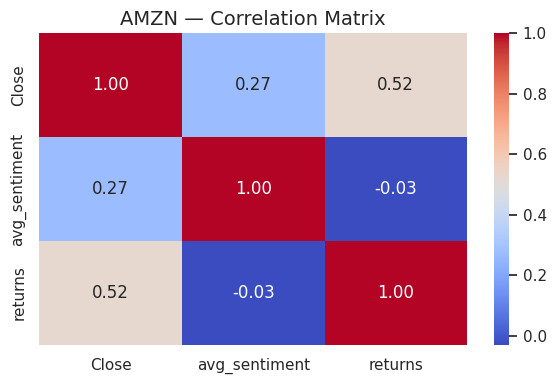

 META:
   Total rows: 2926
   Missing avg_sentiment: 2852
   Missing returns: 1
   Rows available for correlation: 74


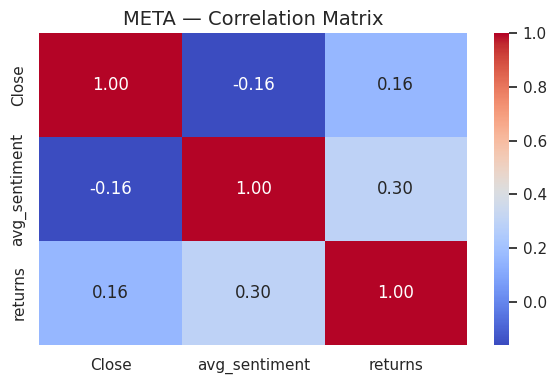

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, ticker):
    df = df.copy()
    df["returns"] = df["Close"].pct_change()
    
    # Diagnostic: check missing values
    total_rows = len(df)
    sentiment_missing = df["avg_sentiment"].isna().sum()
    returns_missing = df["returns"].isna().sum()
    available_rows = df[["Close", "avg_sentiment", "returns"]].dropna().shape[0]

    print(f" {ticker}:")
    print(f"   Total rows: {total_rows}")
    print(f"   Missing avg_sentiment: {sentiment_missing}")
    print(f"   Missing returns: {returns_missing}")
    print(f"   Rows available for correlation: {available_rows}")

    # Check if enough data to visualize
    if available_rows < 5:
        print(f" Skipping {ticker} — Not enough valid rows for correlation matrix.\n")
        return

    # Plot correlation matrix
    subset = df[["Close", "avg_sentiment", "returns"]].dropna()
    corr = subset.corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{ticker} — Correlation Matrix", fontsize=14)
    plt.tight_layout()
    plt.show()

#  Run for all companies
for ticker, df in merged_data.items():
    plot_correlation_matrix(df, ticker)
